In [1]:
import tweepy

In [2]:
consumer_key = "hz76GGcveHsN26QvAcTHhDVnn" 
consumer_secret = "hrBmAzughGzIV7oMvYnMb3JqXBEa4nXnrhzNSDQ7pTPnjaxi4n"
access_key = "2547850260-3sVyHvzTYVTME2OEKhr9XEaZJ60eVvmSTMDwFDr"
access_secret = "CRJmrH50FcbMAvDrguTTmgrQwVp81avbLJKCXzulV1d2B"

In [3]:
# Authorization to consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [4]:
# Access to user's access key and access secret 
auth.set_access_token(access_key, access_secret)

In [5]:
# Calling api 
api = tweepy.API(auth)

In [24]:
# Tweets to be extracted
c = "#amazonIN"
search_words = c + " -filter:retweets"
t = tweepy.Cursor(api.search,
                       q = search_words,
                       lang = "en").items(1000)
tweets = [tweet.text for tweet in t]

In [11]:
tweets

['#Ecommercephotography\nGurgaon#videography #photography #weddingphotography #Products #VIDEO #Dthirdeyestudio… https://t.co/jvK8OAPxyk',
 'I hope i win\n#quiztimemoringswithamazon\n#amazonIn https://t.co/0hm232nLYT',
 '#QuizTimeMorningsWithAmazon\n#amazonin\nDone 👍 https://t.co/4XeW6g22qj',
 '#quiztimemorningswithamazon \n#quiztimemorningswithamazon \n#amazonIN \n#amazonquiz \n#iPhoneXR\n#amazon\n#iphonexs \nExit… https://t.co/Uf5SscKJBv',
 'Rabin Roy @papercrafts13 #QuizTimeMorningsWithAmazon plz plz plz god hope I win this Apple iPhone XS #amazonIN https://t.co/Z6ntxln0YH',
 'Sykam.Yanadi@chinna Saikam\n#QuizTimeMoringsWithAmazon \nToday Quiz Time @AmazonIN Iam Enter The Lucky Draw.Thank You… https://t.co/30hsBYHUjo',
 '#QuizTimeMorningsWithAmazon\n#amazonIN\nEligible for Apple iPhone XS https://t.co/nl39ocZ2mT',
 'Adarsh Kumar @Adarsh82586022 \n  #QuizTimeMoringsWithAmazon \n     Thanks for. #amazonIN https://t.co/smx4TksXkr',
 "@AmazonHelp I didn't get any email from Amazon on th

In [37]:
# Tweets to be extracted
search_words = "amazonIN+headphone -filter:retweets"
t = tweepy.Cursor(api.search,
                       q = search_words,
                       lang = "en").items(1000)
tweets = [tweet.text for tweet in t]
tweets

["@Freespirit10110 @raghavsomani @amazonIN Hey Rohan, \nFor Sony XB900N, the product is on Sony's Valentine's Day sale… https://t.co/Gr2uSNt7oG",
 '@Headphone_Zone @raghavsomani -The price of Sony Xb900n Is same as amazon in your site any reason why I buy from yo… https://t.co/WmkWHlQ3Th',
 '#Samsung Galaxy M31 India Launch: 25th Feb, 12PM\nSold Via #AmazonIN\n64MP Quad Rear Camera\n6000mAh Battery\nFHD+ sAMO… https://t.co/qa9ir1cXz0',
 '@amazonIN hey i am regular  customer amazon ecommerce app .i purcahse Boat bluetooth headphone . its two tym defcti… https://t.co/y7v9zWTwtL',
 '@amazonIN  hi amazing guys from amazon, I will be coming india on dated 14 feb, can you guys deliver one headphone… https://t.co/Y2ZCOQoUG7',
 '@OnePlus_IN  I would like to know that if a customer buys your products via @amazonIN does he does not pay you. the… https://t.co/xReCEguNqF']

In [31]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import random
import glob
from textblob import TextBlob
import io
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [25]:
tweets_df = pd.DataFrame({'tweets' : tweets})
tweets_df.head(10)

,tweets
0,#Ecommercephotography\nGurgaon#videography #ph...
1,I hope i win\n#quiztimemoringswithamazon\n#ama...
2,#QuizTimeMorningsWithAmazon\n#amazonin\nDone 👍...
3,#quiztimemorningswithamazon \n#quiztimemorning...
4,Rabin Roy @papercrafts13 #QuizTimeMorningsWith...
5,Sykam.Yanadi@chinna Saikam\n#QuizTimeMoringsWi...
6,#QuizTimeMorningsWithAmazon\n#amazonIN\nEligib...
7,Adarsh Kumar @Adarsh82586022 \n #QuizTimeMori...
8,@AmazonHelp I didn't get any email from Amazon...
9,@AmazonHelp But why the account is blocked??? ...


In [36]:
tweets_df.shape

(151, 3)

In [26]:
stop_words = list(set(stopwords.words('english')))

def cleanse(input_text):
    keep_alpha = re.sub("[^a-zA-Z]"," ",input_text)
    remove_extra_spaces = re.sub("[\s]+"," ",keep_alpha)
    convert_case = remove_extra_spaces.lower()
    stop_words_removal = [word for word in convert_case.split()
                          if word not in stop_words]
    remove_smaller_words = [word for word in stop_words_removal
                          if len(word) >=3]
    clean_tokens = [word for word in remove_smaller_words
                   if 'http' not in word and
                   '@' not in word and
                   '<' not in word and
                   'RT' not in word]
    return " ".join(clean_tokens)

lemmatizer = WordNetLemmatizer()

def lemmatize(input_text):
    lemmas=[]
    tokens = input_text.split()
    for token in tokens:
        tag = nltk.pos_tag([token])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        if tag in tag_dict.keys():
            pos = tag_dict[tag]
            lemma = lemmatizer.lemmatize(token,pos)
            lemmas.append(lemma)
        else:
            lemmas.append(token)
    return " ".join(lemmas)

In [27]:
tweets_df['clean_tweets'] = tweets_df['tweets'].apply(cleanse)
tweets_df['clean_tweets'] = tweets_df['clean_tweets'].apply(lemmatize)
tweets_df

,tweets,clean_tweets
0,#Ecommercephotography\nGurgaon#videography #ph...,ecommercephotography gurgaon videography photo...
1,I hope i win\n#quiztimemoringswithamazon\n#ama...,hope win quiztimemoringswithamazon amazonin nlyt
2,#QuizTimeMorningsWithAmazon\n#amazonin\nDone 👍...,quiztimemorningswithamazon amazonin do xew
3,#quiztimemorningswithamazon \n#quiztimemorning...,quiztimemorningswithamazon quiztimemorningswit...
4,Rabin Roy @papercrafts13 #QuizTimeMorningsWith...,rabin roy papercrafts quiztimemorningswithamaz...
...,...,...
146,#QuizTimeMorningsWithAmazon \n#amazonin \nFina...,quiztimemorningswithamazon amazonin finally ho...
147,#QuizTimeMorningsWithAmazon @AbudlAdil I am pl...,quiztimemorningswithamazon abudladil play ever...
148,#amazonin customer care number(9749685478) all...,amazonin customer care number problem solve op...
149,@kashifrz27gmai1 #AmazonPaySpinAndWin #Amazonq...,kashifrz gmai amazonpayspinandwin amazonquizti...


In [28]:
def get_sentiment(input_string):
    blob = TextBlob(input_string)
    sentiment = blob.sentiment.polarity
    return sentiment

In [29]:
tweets_df['sentiment'] = tweets_df['clean_tweets'].apply(get_sentiment)
tweets_df

,tweets,clean_tweets,sentiment
0,#Ecommercephotography\nGurgaon#videography #ph...,ecommercephotography gurgaon videography photo...,0.000000
1,I hope i win\n#quiztimemoringswithamazon\n#ama...,hope win quiztimemoringswithamazon amazonin nlyt,0.800000
2,#QuizTimeMorningsWithAmazon\n#amazonin\nDone 👍...,quiztimemorningswithamazon amazonin do xew,0.000000
3,#quiztimemorningswithamazon \n#quiztimemorning...,quiztimemorningswithamazon quiztimemorningswit...,0.000000
4,Rabin Roy @papercrafts13 #QuizTimeMorningsWith...,rabin roy papercrafts quiztimemorningswithamaz...,0.800000
...,...,...,...
146,#QuizTimeMorningsWithAmazon \n#amazonin \nFina...,quiztimemorningswithamazon amazonin finally ho...,0.333333
147,#QuizTimeMorningsWithAmazon @AbudlAdil I am pl...,quiztimemorningswithamazon abudladil play ever...,0.400000
148,#amazonin customer care number(9749685478) all...,amazonin customer care number problem solve op...,0.000000
149,@kashifrz27gmai1 #AmazonPaySpinAndWin #Amazonq...,kashifrz gmai amazonpayspinandwin amazonquizti...,0.000000


In [30]:
negative_counts = tweets_df[tweets_df['sentiment']<0].count()[0]
neutral_counts = tweets_df[tweets_df['sentiment']==0].count()[0]
positive_counts = tweets_df[tweets_df['sentiment']>0].count()[0]

print(negative_counts)
print(neutral_counts)
print(positive_counts)

8
66
77


In [32]:
y_pos = [0,1,2]
counts = [positive_counts,neutral_counts,negative_counts]

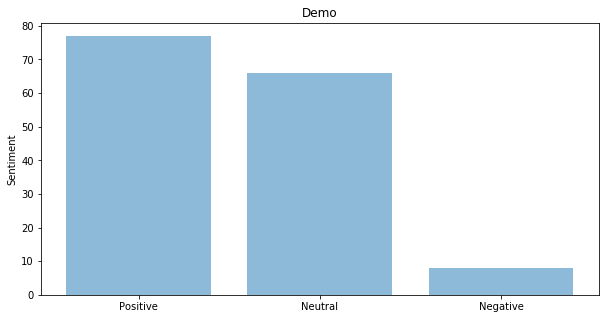

In [33]:
plt.figure(figsize=(10,5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos,['Positive','Neutral','Negative'])
plt.ylabel('Sentiment')
plt.title('Demo')
plt.show()

In [34]:
vectorizer = TfidfVectorizer(ngram_range=(2,2),
                             max_features=100,
                             min_df=0.01,
                             max_df=0.80)

vectorizer.fit_transform(tweets_df['clean_tweets'])

#top 20 words in TF-IDF (word, TF-IDF value, index)
top_n= 20
indices = vectorizer.idf_.argsort()[::-1] # sort by TF-IDF
features = vectorizer.get_feature_names() # word list
top_features = [(features[i], vectorizer.idf_[i],i)
               for i in indices[:top_n]]

d = {}
for i in top_features:
    d[i[0]] = i[1]
    
w = WordCloud(background_color='white',
             max_words=200,
             max_font_size=200,
             height=2000,
             width=2000,
             colormap='rainbow').fit_words(d)

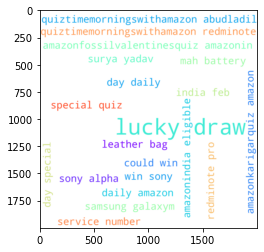

In [35]:
w.to_file('tweepy_demo.png')
plt.imshow(w, interpolation='bilinear')

<img src='tweepy_demo.png'>